In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
reviews = pd.read_csv('output/business_review.csv',encoding = "ISO-8859-1",index_col=0)

In [13]:
reviews

,review_id,user_id,business_id,stars,name,restuarant_stars,review_count,attributes,categories,city
0,3bMgLXMLzm89C_0mkbIFOA,j9hC9EmCsS2S2ZtbsK-l0g,5Q4Gw1pyZnG8IlFNozxIlw,2,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': ""{'...",Restaurants,Gilbert
1,slhog3p6YaoVEej3USo2Iw,IJ1wbXUh_B5Yn6U1YWHy4g,5Q4Gw1pyZnG8IlFNozxIlw,1,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': ""{'...",Restaurants,Gilbert
2,noxz5btWWJjSpbUBmregVQ,_L-JKT5OahgimFlVOo708w,5Q4Gw1pyZnG8IlFNozxIlw,4,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': ""{'...",Restaurants,Gilbert
3,gmiMXHSb6loIDxopmOWHSA,x_I7IDsFeT4vVcEBZLqr7A,5Q4Gw1pyZnG8IlFNozxIlw,5,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': ""{'...",Restaurants,Gilbert
4,xfgHmu5n7cg-uNoU2C1lZg,ceLFSre4hrzkT5VpSlt2Lg,5Q4Gw1pyZnG8IlFNozxIlw,3,Native New Yorker Restaurant,3.0,22,"{'RestaurantsTakeOut': 'True', 'Ambience': ""{'...",Restaurants,Gilbert
...,...,...,...,...,...,...,...,...,...,...
725,m-nZ5_LPGvUSX9K-nZEeGQ,-MeB9ToCwv4OMhLYKleG1w,BjHZpQhu_cQ5e6gV1jnPgQ,4,Island Breeze Restaurant,4.5,3,"{'Ambience': ""{'touristy': False, 'hipster': F...",Restaurants,York
726,MAhsgsGv15cN2ijc_YtOvQ,09rsLrbMY5oNP5vNbccfug,BjHZpQhu_cQ5e6gV1jnPgQ,5,Island Breeze Restaurant,4.5,3,"{'Ambience': ""{'touristy': False, 'hipster': F...",Restaurants,York
727,vyWn6E2lu5kAWiwi4XV5EA,v4TYNlGGDqjXjx-Zb16Vtg,RkUJ2dBInkKtXBwU0CIffQ,5,Cafe Roma,5.0,3,NaN,Restaurants,Mesa
728,W9jzDUBQ6GlXE9N32BK7Gg,EgKoq8z_cOEjp07RsNU8PA,RkUJ2dBInkKtXBwU0CIffQ,5,Cafe Roma,5.0,3,NaN,Restaurants,Mesa


# Most users have only a few number of reviews.

In [5]:
def num_reviews_per_var(df, group_var, count_var, max_count, title_axis_x, title_axis_y):
    num_review_per_var = df.groupby(group_var, as_index=False).count()[[group_var, count_var]]
    num_review_per_var.columns.values[1] = 'num_reviews_per_var'
    reviews_per_var = num_review_per_var.groupby('num_reviews_per_var', as_index=False).count()
    reviews_per_var.columns.values[1] = 'num_' + group_var
    more_than_x = reviews_per_var[reviews_per_var['num_reviews_per_var']>=max_count].sum().to_frame().T
    more_than_x['num_reviews_per_var'] = max_count
    reviews_per_var = pd.concat([reviews_per_var[reviews_per_var['num_reviews_per_var']<max_count],
                                 more_than_x]).reset_index(drop=True)
    total_var = reviews_per_var['num_' + group_var].sum()
    reviews_per_var['num_' + group_var] = 100*reviews_per_var['num_' + group_var]/total_var
    ax = reviews_per_var.plot(x='num_reviews_per_var',y='num_' + group_var, kind='bar')    
    ax.set_ylabel(title_axis_y)
    ax.set_xlabel(title_axis_x)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%2.0f%%'))

In [9]:
import matplotlib.ticker as mtick
sns.set_style("whitegrid")
sns.set_context('paper', rc={"font.size":20,"axes.titlesize":20, "axes.labelsize":20,
                             "xtick.labelsize":20, "ytick.labelsize":20})

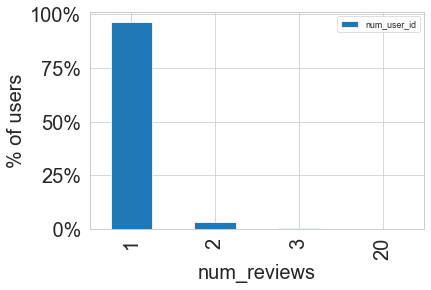

In [10]:
num_reviews_per_var(reviews, 'user_id', 'review_id', 20, 'num_reviews', '% of users')

## User bias: some users tend to give higher ratings than others.
The histogram also shows differences in the average stars per user showing that some users tend to give higher ratings than others. These biases between users needs to be captured by our baseline model.

In [19]:
users = pd.read_csv('output/user.csv',encoding = "ISO-8859-1")

user_ftres = [user_ftre for user_ftre in users.columns.tolist() if 'user_' in user_ftre]
y_user = 'average_stars'
user_compl_ftres = [ftre for ftre in user_ftres if 'user_compliment' in ftre]
user_count_ftres = ['user_cool', 'user_fans', 'user_funny', 'user_review_count', 'user_useful']
user_cat_ftres = ['user_elite_flag', 'user_friends_flag', 'yelping_since']

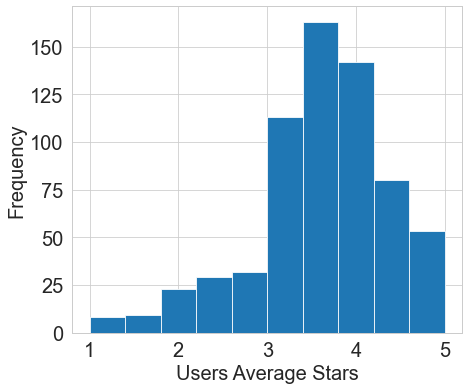

In [20]:
fig, ax = plt.subplots(1,1, figsize=(7, 6))
users[y_user].plot(kind='hist', ax=ax)
ax.set_xlabel('Users Average Stars')
plt.show()

## Most businesses have more than 3 reviews.
Looking at business, the distribution of number of reviews per business is less ‘right-skewed’ and we have more restaurants with more than 3 reviews.

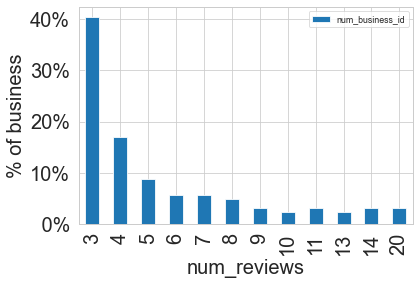

In [21]:
num_reviews_per_var(reviews, 'business_id', 'review_id', 20, 'num_reviews', '% of business')

In [12]:
reviews[['business_id','user_id', 'review_count']].groupby(['business_id', 'user_id']).count()

review_count
business_id            user_id                             
-IeTLBMD3FiggvD7-VE1OQ E73xr_twLJZemdGrXWQobQ             1
                       buhNf2dvGC4O21gll-8ieA             1
                       kEceuUC2C_C_Ta_vtYLyPA             1
0K1b9ilh72dVHKtDEFF2OA 9TY2iU0mhsVL17VP0S2D4w             1
                       cUqU7UfSaamDg0L5TIJPRg             1
...                                                     ...
xjTZe_vgnlnsEUGHfQiOIw SfRlZcoYPw76lNsw7TEO7w             1
                       esn8V2dFR8On3RE075EjMA             1
                       yVMvS4Q7JTxHALm8CTwSZQ             1
                       y_Z79IzC-R-BDtqjOikmVA             1
                       z_ueJdSU51z4RTU9Fg5Ikg             1

[713 rows x 1 columns]